# Importing the Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import random
import statistics

from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy import asarray
from sklearn.model_selection import train_test_split

# Reading Images Directory And Defining TargetArray

In [54]:
def ReadingImagesDirectory(imagesPath):
  imageNames = np.array([])
  targetArray = np.array([])
  imageNamesList = os.listdir(imagesPath)
  
  for imageName in imageNamesList:
    splitedName = imageName.split("_")
    targetValue = 0 if splitedName[0] == "rishith" else 1
    imageNames = np.append(imageNames,imagesPath+ "/" + imageName)
    targetArray = np.append(targetArray, targetValue)
  print("STATUS: -  Feteched the Image directory and Defined the Target Images.")
  return (imageNames, targetArray)

(imagesPathDirectory, targetArray) = ReadingImagesDirectory("/content/drive/MyDrive/f22-dataset/23")

STATUS: -  Feteched the Image directory and Defined the Target Images.


# Reading the Images from the Image Directory.

In [55]:
def ReadingImages(imagesPathDirectory):
  imagesData = []
  for imagePath in imagesPathDirectory:
    readImage = cv2.imread(imagePath)
    imagesData.append(readImage)
  print("STATUS: - Read the Images in the RGB values")
  return np.array(imagesData)
imageData = ReadingImages(imagesPathDirectory)

def ReadingImagesGrayScale(imagesPathDirectory):
  imagesData = []
  for imagePath in imagesPathDirectory:
    readImage = cv2.imread(imagePath)
    readImage = cv2.cvtColor(readImage, cv2.COLOR_BGR2GRAY)
    imagesData.append(readImage)
  print("STATUS: - Read the Images in the GrayScale values")
  return np.array(imagesData)
imageDataGrayScale = ReadingImagesGrayScale(imagesPathDirectory)

STATUS: - Read the Images in the RGB values
STATUS: - Read the Images in the GrayScale values


# Reducing the Varience in the values of the Image Data

Here the image values are in the range of the 0 to 255. The highest standard deviation is 255 and lowest is 0.

=> Dividing the Image Data values with 255. So, that the image values are in the range of 0 to 1. Finally the max standard deviation is 1. 

In [57]:
imageData = imageData/255.0
imageDataGrayScale = imageDataGrayScale/255.0
print("STATUS: Converted the values and reduced the varience of The values.")

STATUS: Converted the values and reduced the varience of The values.


# CNN MODEL

In [6]:
class CNNModel:
    def __init__(self, padding, activation, inputShape, kernelSize, poolingSize):
        self.__padding = padding
        self.__activation = activation
        self.__inputShape = inputShape
        self.__kernelSize = kernelSize
        self.__poolingSize = poolingSize
        

    def Model(self):
        model = tf.keras.Sequential([
            # 1st convolutional layer
            tf.keras.layers.Conv2D(64, kernel_size=self.__kernelSize, input_shape=self.__inputShape, padding=self.__padding,
                                   activation=self.__activation[0]),
            tf.keras.layers.MaxPooling2D(pool_size=self.__poolingSize),
            tf.keras.layers.Dropout(0.2),
            # 2nd convolutional layer
            tf.keras.layers.Conv2D(32, kernel_size=self.__kernelSize, activation=self.__activation[1]),
            tf.keras.layers.MaxPooling2D(pool_size=self.__poolingSize),
            tf.keras.layers.Dropout(0.2),
            # 3rd convolutional layer
            tf.keras.layers.Conv2D(64, kernel_size=self.__kernelSize, activation=self.__activation[2]),
            tf.keras.layers.MaxPooling2D(pool_size=self.__poolingSize),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32, activation=self.__activation[3]),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(16, activation=self.__activation[4]),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(8, activation=self.__activation[5]),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(2, activation=self.__activation[6])
        ])
        print("STATUS: - Model Created Successfully")
        return model

# Training the model with Original data

In [7]:
# Splitting the data to training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(imageData, targetArray, random_state= 3, test_size= 0.2)

STATUS: - Model Created Successfully
Model Information: - 
Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_375 (Conv2D)         (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d_375 (MaxPooli  (None, 50, 50, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_750 (Dropout)       (None, 50, 50, 64)        0         
                                                                 
 conv2d_376 (Conv2D)         (None, 48, 48, 32)        18464     
                                                                 
 max_pooling2d_376 (MaxPooli  (None, 24, 24, 32)       0         
 ng2D)                                                           
                                                           

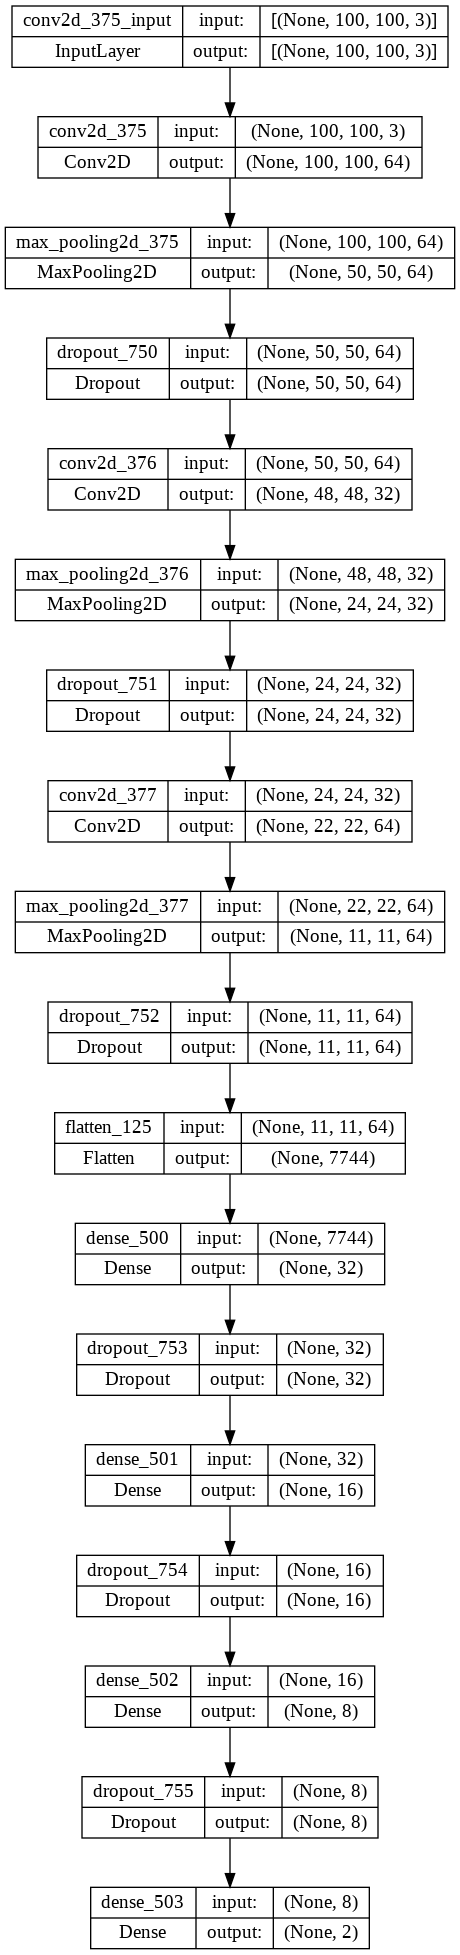

In [58]:
padding     = "same"
activation  = ["relu","relu", "relu", "relu", "relu", "relu", "softmax"]
inputShape  = (100,100,3)
kernelSize  = (3,3)
poolingSize = (2,2)

objectCNN = CNNModel(padding, activation, inputShape, kernelSize, poolingSize)
modelCNN = objectCNN.Model()
print("Model Information: - ")
modelCNN.summary()

tf.keras.utils.plot_model(
    modelCNN,
    to_file="modelCNN.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [14]:
modelCNN.compile(tf.keras.optimizers.Adamax(learning_rate=0.02),loss='MSE',metrics=['accuracy'])

In [15]:
random.seed(1)
X_train = X_train.reshape(-1, 100,100,3, 1)
X_test = X_test.reshape(-1, 100,100,3, 1)
history = modelCNN.fit(X_train, Y_train, batch_size= 10, epochs = 50, validation_data = (X_test, Y_test))

Epoch 1/50
5/5 [==============================] - 2s 284ms/step - loss: 0.3980 - accuracy: 0.5238 - val_loss: 0.2500 - val_accuracy: 0.5455
Epoch 2/50
5/5 [==============================] - 1s 223ms/step - loss: 0.2504 - accuracy: 0.4048 - val_loss: 0.2502 - val_accuracy: 0.4545
Epoch 3/50
5/5 [==============================] - 1s 224ms/step - loss: 0.2502 - accuracy: 0.5952 - val_loss: 0.2502 - val_accuracy: 0.4545
Epoch 4/50
5/5 [==============================] - 1s 219ms/step - loss: 0.2502 - accuracy: 0.5714 - val_loss: 0.2501 - val_accuracy: 0.4545
Epoch 5/50
5/5 [==============================] - 1s 223ms/step - loss: 0.2502 - accuracy: 0.5476 - val_loss: 0.2502 - val_accuracy: 0.4545
Epoch 6/50
5/5 [==============================] - 1s 224ms/step - loss: 0.2501 - accuracy: 0.5476 - val_loss: 0.2501 - val_accuracy: 0.4545
Epoch 7/50
5/5 [==============================] - 1s 228ms/step - loss: 0.2501 - accuracy: 0.5476 - val_loss: 0.2500 - val_accuracy: 0.4545
Epoch 8/50
5/5 [====

**Ploting the graphs for the accuracy and loss**

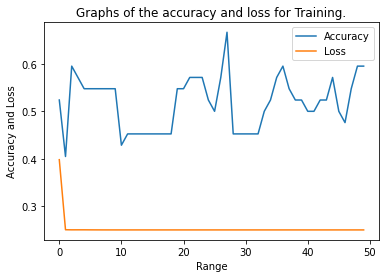

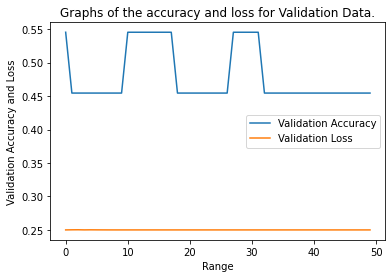

In [16]:
plt.title("Graphs of the accuracy and loss for Training.")
plt.xlabel("Range")
plt.ylabel("Accuracy and Loss")
plt.plot(np.arange(50),history.history["accuracy"], label = "Accuracy")
plt.plot(np.arange(50),history.history["loss"],label = "Loss")
plt.legend()
plt.show()

plt.title("Graphs of the accuracy and loss for Validation Data.")
plt.xlabel("Range")
plt.ylabel("Validation Accuracy and Loss")
plt.plot(np.arange(50),history.history["val_accuracy"], label = "Validation Accuracy")
plt.plot(np.arange(50),history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

# Research Question-1: - How can we increase the accuracy?

# Hyper Parameter Tuning



=> Finding out the best **Activation Functions** for the Model.

Here the there are seven activation functions which are used in the model creation. 

Some of the combinations are handpicked by us and checked the performance of the Model by changing the activation functions.

Results: - After bunch of iterations on the activations, the activation functions at the index 1 wins max time.

**Q) Why to choose the last layer as Sigmoid?**
Here the there only two outputs at the last layer of the model which might be 0 or 1.

In [19]:
random.seed(2)
# Predefining the Variables
activation  = [["relu","relu", "relu", "relu", "relu", "relu", "softmax"],
               ["relu", "relu", "relu", "LeakyReLU", "LeakyReLU", "LeakyReLU", "softmax"],
               ["relu", "LeakyReLU", "relu", "LeakyReLU", "relu", "LeakyReLU", "softmax"],
               ["LeakyReLU", "LeakyReLU", "LeakyReLU", "LeakyReLU", "LeakyReLU", "LeakyReLU", "softmax"],]

# Declaring the accuracy and loss variables.
accuracy = np.array([])
loss     = np.array([])
# Lets analyze for 20 Iterations.
activationWithHighAccuracy = np.array([])
for i in range(10):
  print("Iteration Running was: -", i)
  activationAccuracies = np.array([])
  for i in range(len(activation)):
    objectCNN = CNNModel(padding, activation[i], inputShape, kernelSize, poolingSize)
    modelCNN = objectCNN.Model()
    modelCNN.compile(tf.keras.optimizers.Adamax(learning_rate=0.02),loss=tf.keras.losses.MSE,metrics=['accuracy'])
    history  = modelCNN.fit(X_train, Y_train, batch_size= 1, epochs = 10)
    maxAccuracy = max(history.history['accuracy'])
    accuracy = np.append(accuracy, maxAccuracy)
  activationWithHighAccuracy = np.append(activationWithHighAccuracy, np.argmax(accuracy))

print("The best activation functions are: ",statistics.mode(activationWithHighAccuracy))

Iteration Running was: - 0
STATUS: - Model Created Successfully
Epoch 1/10
42/42 [==============================] - 2s 36ms/step - loss: 0.2756 - accuracy: 0.4524
Epoch 2/10
42/42 [==============================] - 1s 35ms/step - loss: 0.2505 - accuracy: 0.5714
Epoch 3/10
42/42 [==============================] - 1s 35ms/step - loss: 0.2500 - accuracy: 0.4524
Epoch 4/10
42/42 [==============================] - 2s 36ms/step - loss: 0.2500 - accuracy: 0.5714
Epoch 5/10
42/42 [==============================] - 1s 35ms/step - loss: 0.2500 - accuracy: 0.4762
Epoch 6/10
42/42 [==============================] - 1s 35ms/step - loss: 0.2500 - accuracy: 0.5476
Epoch 7/10
42/42 [==============================] - 1s 35ms/step - loss: 0.2500 - accuracy: 0.5476
Epoch 8/10
42/42 [==============================] - 1s 35ms/step - loss: 0.2500 - accuracy: 0.5952
Epoch 9/10
42/42 [==============================] - 1s 35ms/step - loss: 0.2500 - accuracy: 0.4524
Epoch 10/10
42/42 [==========================

In [21]:
# Final Activations 
activation = activation[int(statistics.mode(activationWithHighAccuracy))]

['relu', 'relu', 'relu', 'LeakyReLU', 'LeakyReLU', 'LeakyReLU', 'softmax']


=> Tuning the **learning rate** and finding out which learning rate will get the most accuracy.

STATUS: - Model Created Successfully
42/42 [==============================] - 3s 56ms/step - loss: 0.2515 - accuracy: 0.5000
STATUS: - Model Created Successfully
42/42 [==============================] - 4s 71ms/step - loss: 0.4941 - accuracy: 0.4762
STATUS: - Model Created Successfully
42/42 [==============================] - 3s 50ms/step - loss: 0.4941 - accuracy: 0.4048
STATUS: - Model Created Successfully
42/42 [==============================] - 4s 53ms/step - loss: 0.4940 - accuracy: 0.5000
STATUS: - Model Created Successfully
42/42 [==============================] - 3s 51ms/step - loss: 0.4941 - accuracy: 0.5714
STATUS: - Model Created Successfully
42/42 [==============================] - 3s 52ms/step - loss: 0.4940 - accuracy: 0.5952
STATUS: - Model Created Successfully
42/42 [==============================] - 3s 49ms/step - loss: 0.4941 - accuracy: 0.4286
STATUS: - Model Created Successfully
42/42 [==============================] - 5s 82ms/step - loss: 0.4941 - accuracy: 0.6190


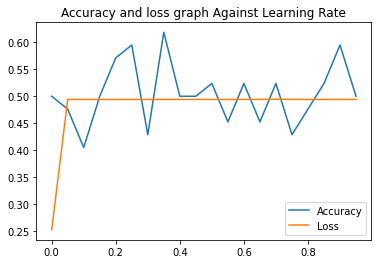

The best learning rate: 0.35000000000000003


In [27]:
random.seed(1)
# TASK1: - Tuning the Learning Rate
accuracy = np.array([])
loss = np.array([])
learningRate = np.arange(0,1,0.05)

for LR in learningRate:
  modelCNN = objectCNN.Model()
  modelCNN.compile(tf.keras.optimizers.Adamax(learning_rate=LR),loss=tf.keras.losses.MSE,metrics=['accuracy'])
  history  = modelCNN.fit(X_train, Y_train, batch_size= 1)
  accuracy = np.append(accuracy, history.history["accuracy"])
  loss     = np.append(loss, history.history["loss"])

plt.title("Accuracy and loss graph Against Learning Rate")
plt.plot(learningRate, accuracy, "-", label = "Accuracy")
plt.plot(learningRate, loss, "-", label = "Loss")
plt.legend()
plt.show()

# Gettign the learning rate with max accuracy.
bestLearningRate = learningRate[np.argmax(accuracy)]
print("The best learning rate:", bestLearningRate)
learningRate = bestLearningRate

# Research Question 3: - Replacing the image values with averaged sum of the eigen values.

Declaring the module which calculate the Average Eigen values of the images.

In [28]:
class module:
  def __init__(self,data):
    self.data = data
  def vectorModule(self,point1, point2, image):
    values = np.array([])
    for i in range(-2,3):
      for j in range(-2,3):
        try:
          values = np.append(values, image[point1 + i][point2 + j])
        except:
          values = np.append(values, 0)
    values = np.reshape(values, (5,5))
    return np.average(np.linalg.eigvals(values))

  def vectorModule1(self):
    for len_ in range(len(self.data)):
      for i in range(100):
        for j in range(100):
          self.data[len_][i][j] = self.vectorModule(i,j, self.data[len_])
    return self.data

Reading the images in the grayscale

In [ ]:
# Print the photos of the 10 Images.

In [29]:
# variable "imageDataGrayScale" contains the grayscale images of the data.
values = imageDataGrayScale.copy()
objectModule = module(values)
eigenImageDataGrayScale = objectModule.vectorModule1()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


In [31]:
np.shape(eigenImageDataGrayScale)

(53, 100, 100)

In [34]:
random.seed(12)
# Model Atributes 
padding     = "same"
activation  = ["relu","relu", "relu", "relu", "relu", "relu", "softmax"]
inputShape  = (100,100,1)
kernelSize  = (3,3)
poolingSize = (2,2)
# Seyperating the testign and training data
X_train, X_test, Y_train, Y_test = train_test_split(eigenImageDataGrayScale, targetArray, random_state= 3, test_size= 0.2)

# Calling the Model Class
objectCNN = CNNModel(padding, activation, inputShape, kernelSize, poolingSize)
modelCNN = objectCNN.Model()
modelCNN.compile(tf.keras.optimizers.Adam(learning_rate=learningRate),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
X_train = X_train.reshape(-1, 100,100, 1)
X_test = X_test.reshape(-1, 100,100, 1)
history1 = modelCNN.fit(X_train, Y_train, batch_size= 30, epochs = 50, validation_data = (X_test, Y_test))
predictedOutput = modelCNN.predict(X_test)

STATUS: - Model Created Successfully
Epoch 1/50
2/2 [==============================] - 2s 592ms/step - loss: 2368327.2500 - accuracy: 0.4048 - val_loss: 52200.7266 - val_accuracy: 0.4545
Epoch 2/50
2/2 [==============================] - 2s 813ms/step - loss: 52772.0781 - accuracy: 0.5714 - val_loss: 225.1249 - val_accuracy: 0.4545
Epoch 3/50
2/2 [==============================] - 1s 374ms/step - loss: 453.5959 - accuracy: 0.5000 - val_loss: 0.9409 - val_accuracy: 0.4545
Epoch 4/50
2/2 [==============================] - 1s 377ms/step - loss: 283.3115 - accuracy: 0.4762 - val_loss: 1.3825 - val_accuracy: 0.4545
Epoch 5/50
2/2 [==============================] - 1s 375ms/step - loss: 132.0509 - accuracy: 0.5714 - val_loss: 0.7573 - val_accuracy: 0.4545
Epoch 6/50
2/2 [==============================] - 1s 377ms/step - loss: 188.5914 - accuracy: 0.5476 - val_loss: 0.7006 - val_accuracy: 0.4545
Epoch 7/50
2/2 [==============================] - 1s 380ms/step - loss: 1.4072 - accuracy: 0.6429 -

**Ploting the graph of the normal accuracy and validation accuracy**

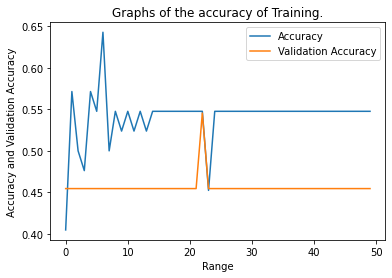

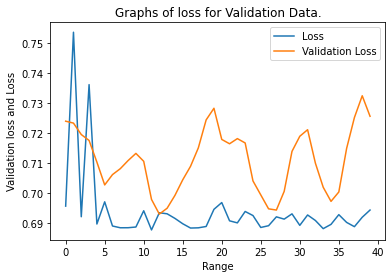

In [40]:
plt.title("Graphs of the accuracy of Training.")
plt.xlabel("Range")
plt.ylabel("Accuracy and Validation Accuracy")
plt.plot(np.arange(50),history1.history["accuracy"], label = "Accuracy")
plt.plot(np.arange(50),history1.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

"""The graphs of the loss are manipulated. Because the first 10 values are so high that vanishes the sight of small loss values."""
plt.title("Graphs of loss for Validation Data.")
plt.xlabel("Range")
plt.ylabel("Validation loss and Loss")
plt.plot(np.arange(40),history1.history["loss"][10:51],label = "Loss")
plt.plot(np.arange(40),history1.history["val_loss"][10:51], label = "Validation Loss")
plt.legend()
plt.show()

# Data Augumentation

In [41]:


class DataAugmentation:
    def __init__(self, imagespath, augmentedimagespath):
        self.__imagesPath = imagespath
        self.__augmentedImagesPath = augmentedimagespath
        self.__dataGenerator = ImageDataGenerator(rotation_range=40,
                                                  shear_range=0.2,
                                                  zoom_range=0.2,
                                                  horizontal_flip=True,
                                                  brightness_range=(0.5, 1.5))
        self.batchSize = 1000
        self.__dataAugmentation()

    def __dataAugmentation(self):
        # Open the image
        images = os.listdir(self.__imagesPath)
        print("STATUS: - Collected the Images for Data Augmentation.")
        for imageName in images:
          try:
            image = cv2.imread(self.__imagesPath+"/"+ imageName)
            imagearray = asarray(image)
            imagearray = imagearray.reshape((1,) + imagearray.shape)
            # Data generator
            number = 0
            prefix = imageName + "_augmented"
            for batch in self.__dataGenerator.flow(imagearray, batch_size=self.batchSize,
                                                   save_to_dir=self.__augmentedImagesPath,
                                                   save_prefix = prefix,
                                                   save_format='png'):
              number += 1
              if number > 100:
                  break
          except:
            pass

In [47]:
random.seed(1)
# Declaring the path and storign in a folder.
AugementedPath = "/content/AugmentedData"
objectAugumented = DataAugmentation("/content/drive/MyDrive/f22-dataset/23", AugementedPath)

# Reading the imagepath and targetArray in the targeted array.
(augmentedImageDirectory, TargetArray) = ReadingImagesDirectory(AugementedPath)

# Reading the Images in GrayScale.
augmentedImageDataGrayScale = ReadingImagesGrayScale(augmentedImageDirectory)

# Reducing the varience of the image values
augmentedImageDataGrayScale = augmentedImageDataGrayScale / 255.0

# Spliting the data
X_train, X_test, Y_train, Y_test = train_test_split(augmentedImageDataGrayScale, TargetArray, random_state= 3, test_size= 0.2)

""" Declaring the model """
# Model Atributes 
padding     = "same"
activation  = ["relu","relu", "relu", "relu", "relu", "relu", "softmax"]
inputShape  = (100,100,1)
kernelSize  = (3,3)
poolingSize = (2,2)

# Calling the Model Class
objectCNN = CNNModel(padding, activation, inputShape, kernelSize, poolingSize)
modelCNN = objectCNN.Model()
modelCNN.compile(optimizer="Adam",loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
X_train = X_train.reshape(-1, 100,100, 1)
X_test = X_test.reshape(-1, 100,100, 1)
history = modelCNN.fit(X_train, Y_train, batch_size= 100, epochs =20, validation_data=(X_test, Y_test))
modelCNN.evaluate(X_test, Y_test, verbose=1)

STATUS: - Model Created Successfully
Epoch 1/20
43/43 [==============================] - 117s 3s/step - loss: 0.6964 - accuracy: 0.4925 - val_loss: 0.6913 - val_accuracy: 0.5465
Epoch 2/20
43/43 [==============================] - 121s 3s/step - loss: 0.6760 - accuracy: 0.5249 - val_loss: 0.6181 - val_accuracy: 0.5465
Epoch 3/20
43/43 [==============================] - 107s 2s/step - loss: 0.5766 - accuracy: 0.6588 - val_loss: 0.4681 - val_accuracy: 0.8122
Epoch 4/20
43/43 [==============================] - 110s 3s/step - loss: 0.4652 - accuracy: 0.7933 - val_loss: 0.3712 - val_accuracy: 0.8638
Epoch 5/20
43/43 [==============================] - 105s 2s/step - loss: 0.3639 - accuracy: 0.8516 - val_loss: 0.2491 - val_accuracy: 0.9211
Epoch 6/20
43/43 [==============================] - 103s 2s/step - loss: 0.2906 - accuracy: 0.8906 - val_loss: 0.1840 - val_accuracy: 0.9427
Epoch 7/20
43/43 [==============================] - 104s 2s/step - loss: 0.2497 - accuracy: 0.9035 - val_loss: 0.1519

[0.011422784999012947, 0.9962441325187683]

**Ploting the graphs of the Validationa and training data**

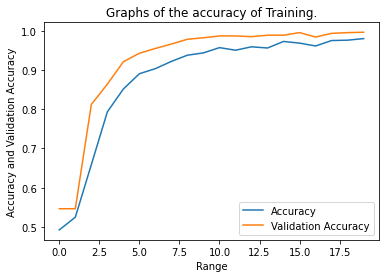

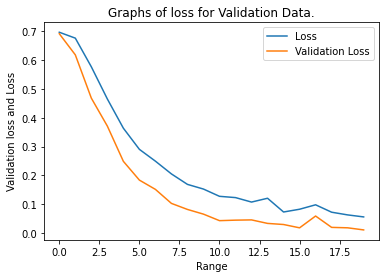

In [52]:
plt.title("Graphs of the accuracy of Training.")
plt.xlabel("Range")
plt.ylabel("Accuracy and Validation Accuracy")
plt.plot(np.arange(20),history.history["accuracy"], label = "Accuracy")
plt.plot(np.arange(20),history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

"""The graphs of the loss are manipulated. Because the first 10 values are so high that vanishes the sight of small loss values."""
plt.title("Graphs of loss for Validation Data.")
plt.xlabel("Range")
plt.ylabel("Validation loss and Loss")
plt.plot(np.arange(20),history.history["loss"],label = "Loss")
plt.plot(np.arange(20),history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

** Saving the weights**

In [53]:
modelCNN.save_weights("model.h5")